<a href="https://colab.research.google.com/github/Santosh-sunkara/Object-Detection-for-Dashcams-using-YOLO/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import torch
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import yaml

In [23]:
IMG_HEIGHT = 720
IMG_WIDTH = 1280
# Source: https://github.com/ucbdrive/bdd100k/blob/master/doc/format.md#bdd100k-details
labels = [
    "bike",
    "bus",
    "car",
    "motor",
    "person",
    "rider",
    "traffic light",
    "traffic sign",
    "train",
    "truck"
]

TRAIN_PATH = '/content/drive/MyDrive/Project/Data/train'
VAL_PATH = '/content/drive/MyDrive/Project/Data/val'
MODEL_PATH = '/content/drive/MyDrive/Project/Data/best.pt'
INFERENCE_PATH = '/content/drive/MyDrive/Project/Data/inference_vid.mp4'
STEERING_WHEEL_PATH = '/content/drive/MyDrive/Project/Data/steering_wheel_image.jpg'

In [24]:
train_images = glob(f'{TRAIN_PATH}/*.jpg')
val_images = glob(f'{VAL_PATH}/*.jpg')
n_samples = 5
train_sample = np.random.choice(train_images, size=n_samples)
val_sample = np.random.choice(val_images, size=n_samples)

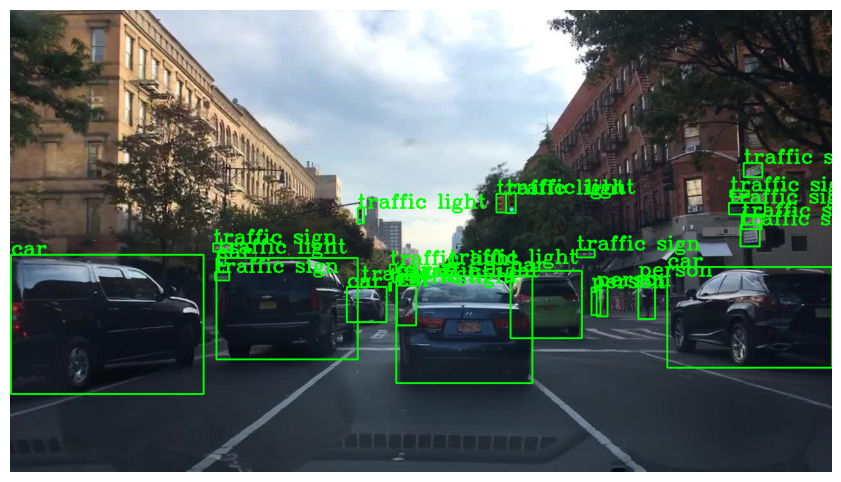

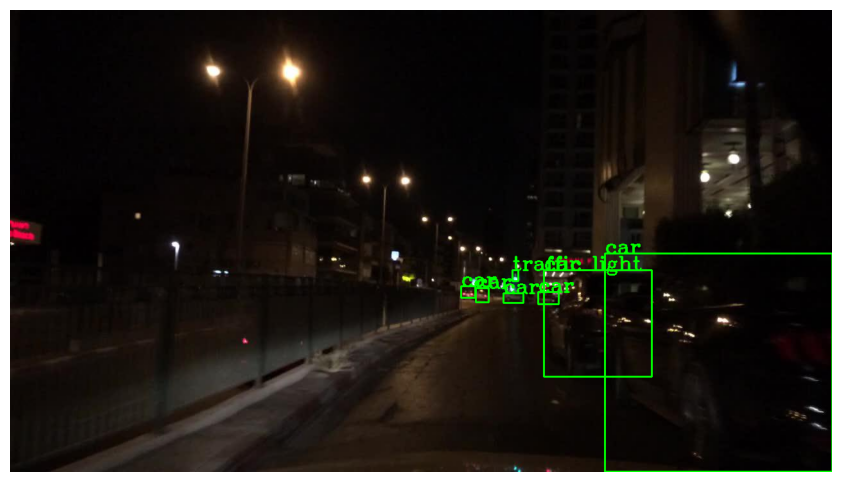

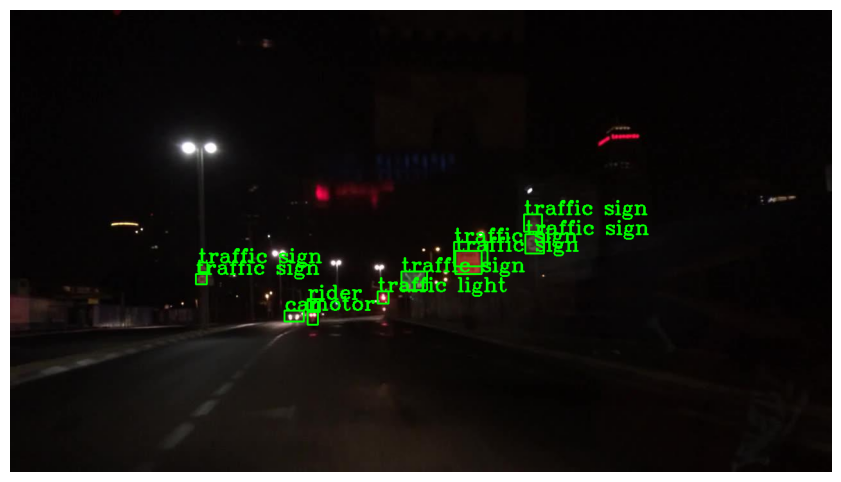

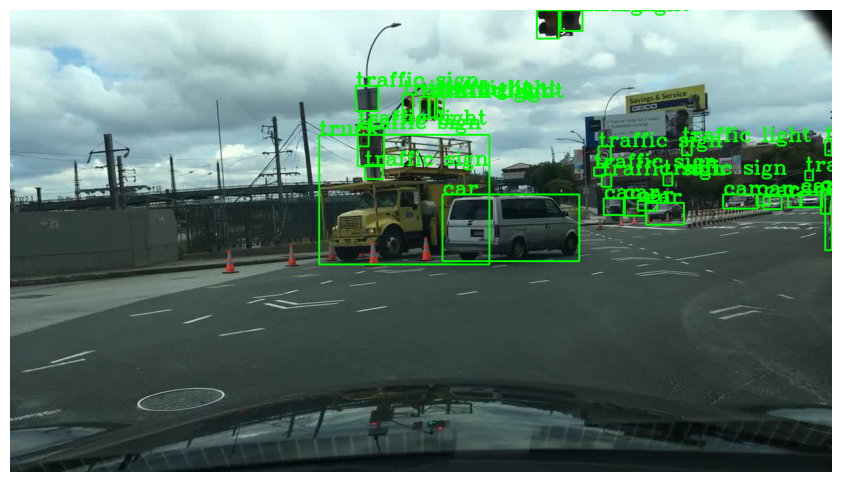

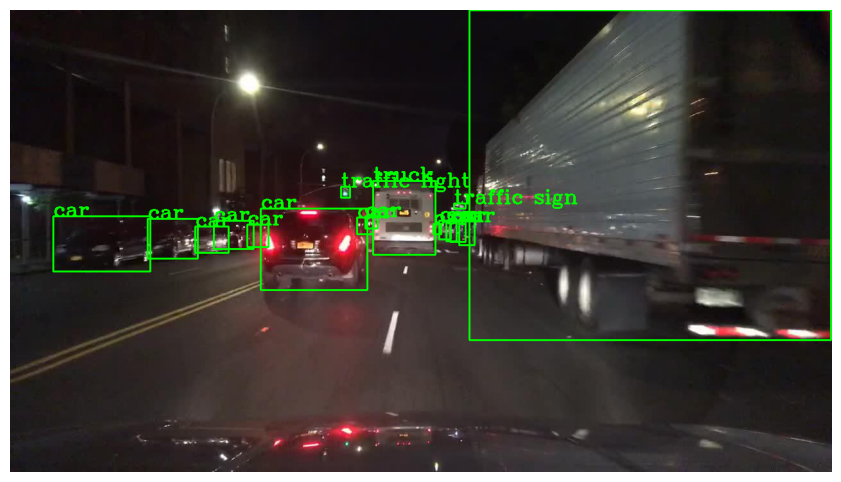

In [25]:
for i in range(n_samples):
    _, ax = plt.subplots(figsize=(16,6))
    train_path = train_sample[i]
    img_id = train_path.split(os.path.sep)[-1].split('.')[0]
    label_file = os.path.join(TRAIN_PATH, f'{img_id}.txt')
    with open(label_file, 'r') as f:
        lines = f.readlines()
    img = cv2.imread(train_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for label in lines:
        splits = label.split()
        category = labels[int(splits[0])]
        x_center = float(splits[1]) * IMG_WIDTH
        y_center = float(splits[2]) * IMG_HEIGHT
        width = float(splits[3]) * IMG_WIDTH
        height = float(splits[4]) * IMG_HEIGHT

        pt1_x = x_center - width/2
        pt1_y = y_center - height/2
        pt2_x = x_center + width/2
        pt2_y = y_center + height/2

        pt1 = (int(pt1_x), int(pt1_y))
        pt2 = (int(pt2_x), int(pt2_y))

        img = cv2.rectangle(img, pt1=pt1, pt2=pt2, color=(0,255,0), thickness=2)
        img = cv2.putText(img, category, org=pt1,
                          color=(0,255,0), fontFace = cv2.FONT_HERSHEY_COMPLEX,
                          fontScale=1, thickness=2)


    ax.imshow(img)
    ax.axis('off')
    plt.show()
